# Time Series Data

The time series data can have different trends such as:
- Stationarity:

This means the data over time doesn't change. 
- Drift: 

The data might change over time with a change. We can present it as:
$$ (T_0,\ldots,T_t) \sim (T_t,\ldots,T_{t+t_0}) $$

- Seasonality:

It can explained by a simple example: The temperature varies over time in different seasons of a year. Temperature has a seasonal behavior. This behavior can have periodic movement. 
$$ T_t = A \sin(\omega t+ \phi) + B \cos(\omega t + \phi)$$

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas
import scipy

from scipy.optimize import curve_fit

### Exponential trend in time series data

In [214]:
df=pd.read_csv('./data/time_series_data/sales-of-shampoo-over-a-three-ye.csv')
df.shape

(36, 2)

In [215]:
df.head(10)


,Month,Sales of shampoo over a three year period
0,1-Jan,266.0
1,1-Feb,145.9
2,1-Mar,183.1
3,1-Apr,119.3
4,1-May,180.3
5,1-Jun,168.5
6,1-Jul,231.8
7,1-Aug,224.5
8,1-Sep,192.8
9,1-Oct,122.9


In [217]:
hvexplorer = hvplot.explorer(df)
hvexplorer

hvDataFrameExplorer(axes=Axes(explorer=..., height=None, legend='right', logx=False, logy=False, name='Axes14165', responsive=False, shared_axes=True, width=None, xlim=None, ylim=None), by=[], colormapping=Colormapping(clim=None, cmap='kbc_r', cnorm='linear', color=None, colorbar=None, explorer=..., name='Colormapping14193', rescale_discrete_levels=True, symmetric=False), groupby=[], kind='line', labels=Labels(clabel='', explorer=..., fontscale=1, name='Labels14214', rot=0, title='', xlabel='', ylabel=''), name='hvDataFrameExplorer14150', operations=Operations(aggregator=None, datashade=False, dynspread=False, explorer=..., name='Operations14234', rasterize=False, x_sampling=None, y_sampling=None), style=Style(alpha=1, explorer=..., name='Style14254'), x='index', y='Month', y_multi=[], z=None)

In [218]:
count = 0
for i in range(len(df)):
    df.loc[i,'days']=count
    count += 30

In [219]:
x = df['days']
y = list(df['Sales of shampoo over a three year period'])

/home/mn/python-environments/env/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


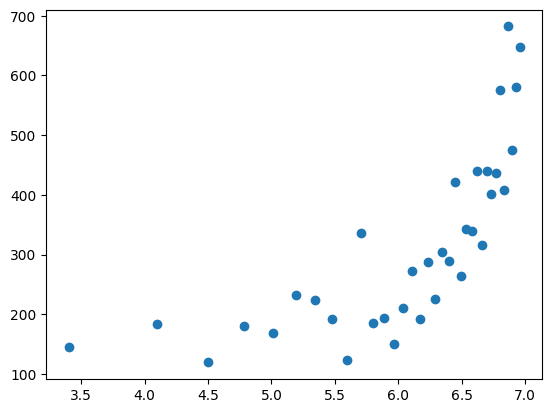

In [220]:
plt.plot(np.log(x), y, 'o')

In [173]:
def exp(x):
    return np.exp(x)

Text(0.5, 1.0, 'Shampoo Sale Price')

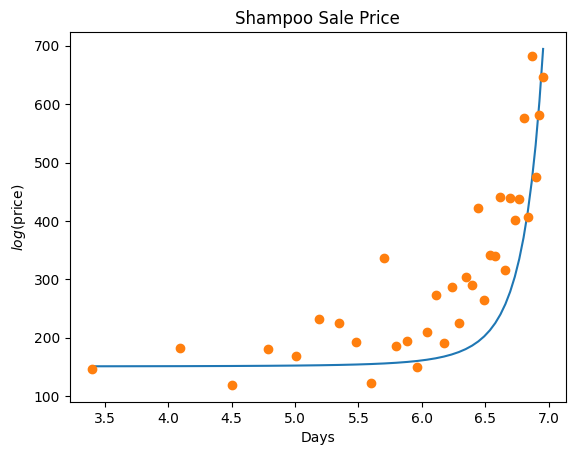

In [221]:
plt.plot(np.log(x), exp(0.006*x)+150)
plt.plot(np.log(x), y, 'o')
plt.xlabel('Days')
plt.ylabel('$log$(price)')
plt.title('Shampoo Sale Price')

In [225]:
ls ./data/time_series_data/

daily-minimum-temperatures-in-me.csv  monthly-beer-production-in-austr.csv
Electric_Production.csv               sales-of-shampoo-over-a-three-ye.csv


In [324]:
df = pd.read_csv('./data/time_series_data/daily-minimum-temperatures-in-me.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        3650 non-null   object
 1   Daily minimum temperatures  3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


In [325]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        3650 non-null   string
 1   Daily minimum temperatures  3650 non-null   string
dtypes: string(2)
memory usage: 57.2 KB


In [326]:
df['Date']=pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        3650 non-null   datetime64[ns]
 1   Daily minimum temperatures  3650 non-null   string        
dtypes: datetime64[ns](1), string(1)
memory usage: 57.2 KB


In [327]:
count=0

for idx in df.index:
    try:
        number_days = (df.loc[idx+1, 'Date'] - df.loc[idx, 'Date']).days
        if number_days == 1:
            df.loc[idx, 'days'] = count
        
        count += 1
    except:
        pass

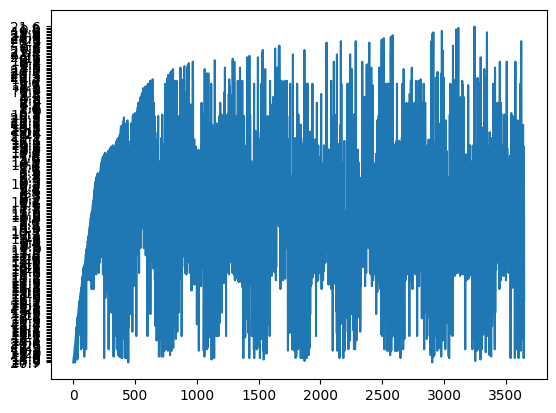

In [328]:
plt.plot(df['days'], df['Daily minimum temperatures'])

In [329]:
df['Daily minimum temperatures'] = df['Daily minimum temperatures'].str.replace(r'[^0-9]', '')
df['Daily minimum temperatures'] = df['Daily minimum temperatures'].astype(float)

/tmp/ipykernel_8423/2662836268.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Daily minimum temperatures'] = df['Daily minimum temperatures'].str.replace(r'[^0-9]', '')


In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        3650 non-null   datetime64[ns]
 1   Daily minimum temperatures  3650 non-null   float64       
 2   days                        3647 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 85.7 KB


In [331]:
# some other similar statistics
df['cum_sum'] = df['Daily minimum temperatures'].cumsum()
df['count'] = range(1,len(df['Daily minimum temperatures'])+1)
df['mov_avg'] = df['cum_sum'] / df['count']

# other statistics
df['rolling_mean2'] = df['Daily minimum temperatures'].rolling(window=2).mean()

Text(0, 0.5, 'temperature')

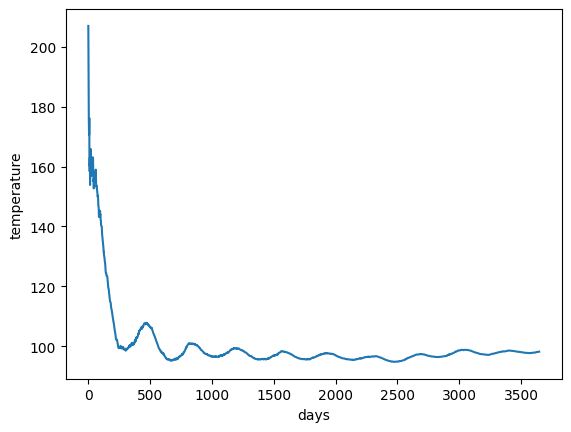

In [344]:
plt.plot(df['days'], df['mov_avg'])
plt.xlabel('days')
plt.ylabel('temperature')

In [337]:
print(max(df['Daily minimum temperatures']))
print(max(df['mov_avg']))

263.0
207.0


In [338]:
df2 = df[ df['days']>250 ]

Text(0, 0.5, 'temperature')

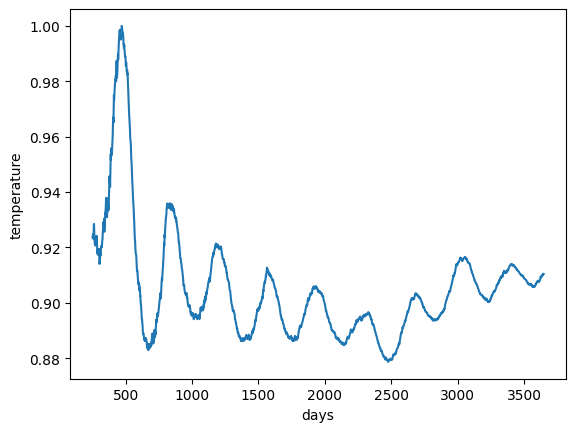

In [365]:
plt.plot(df2['days'], df2['mov_avg']/max(df2['mov_avg']))
plt.xlabel('days')
plt.ylabel('temperature')

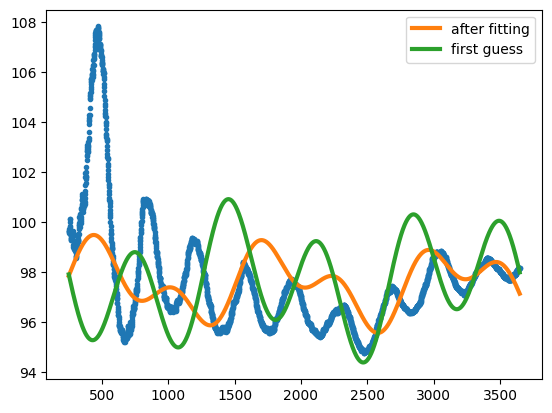

In [403]:
x = df2['days']
y = df2['mov_avg']

guess_freq_sin = 1/110
guess_freq_cos = 1/250
guess_amplitude_sin = np.std(df2['mov_avg'])
guess_amplitude_cos = 0.5*np.std(df2['mov_avg'])
guess_phase_sin = 45
guess_phase_cos = 0
guess_offset = np.mean(df2['mov_avg'])

p0=[
    guess_freq_sin,
    guess_freq_cos,
    guess_amplitude_sin,
    guess_amplitude_cos,
    guess_phase_sin,
    guess_phase_cos,
    guess_offset
   ]

def sin(x, freq_sin, freq_cos, guess_amplitude_sin, guess_amplitude_cos, phase_sin, phase_cos, offset):
    return guess_amplitude_sin*np.sin(freq_sin*x + phase_sin) + guess_amplitude_cos*np.cos(freq_cos*x + phase_cos) +offset

fit = curve_fit(sin, x, y, p0=p0)

fit_A = fit[0][0]
fit_B = fit[0][1]
fit_C = fit[0][2]
fit_D = fit[0][3]

y_guess = sin(x, *p0)

y_fit = sin(x, *fit[0])

plt.plot(y, '.')
plt.plot(y_fit, label='after fitting', linewidth=3)
plt.plot(y_guess, label='first guess', linewidth=3)
plt.legend()
plt.show()
